## Q1

For loss of form (x-xhat)^3

## Generating dataset using numpy.random

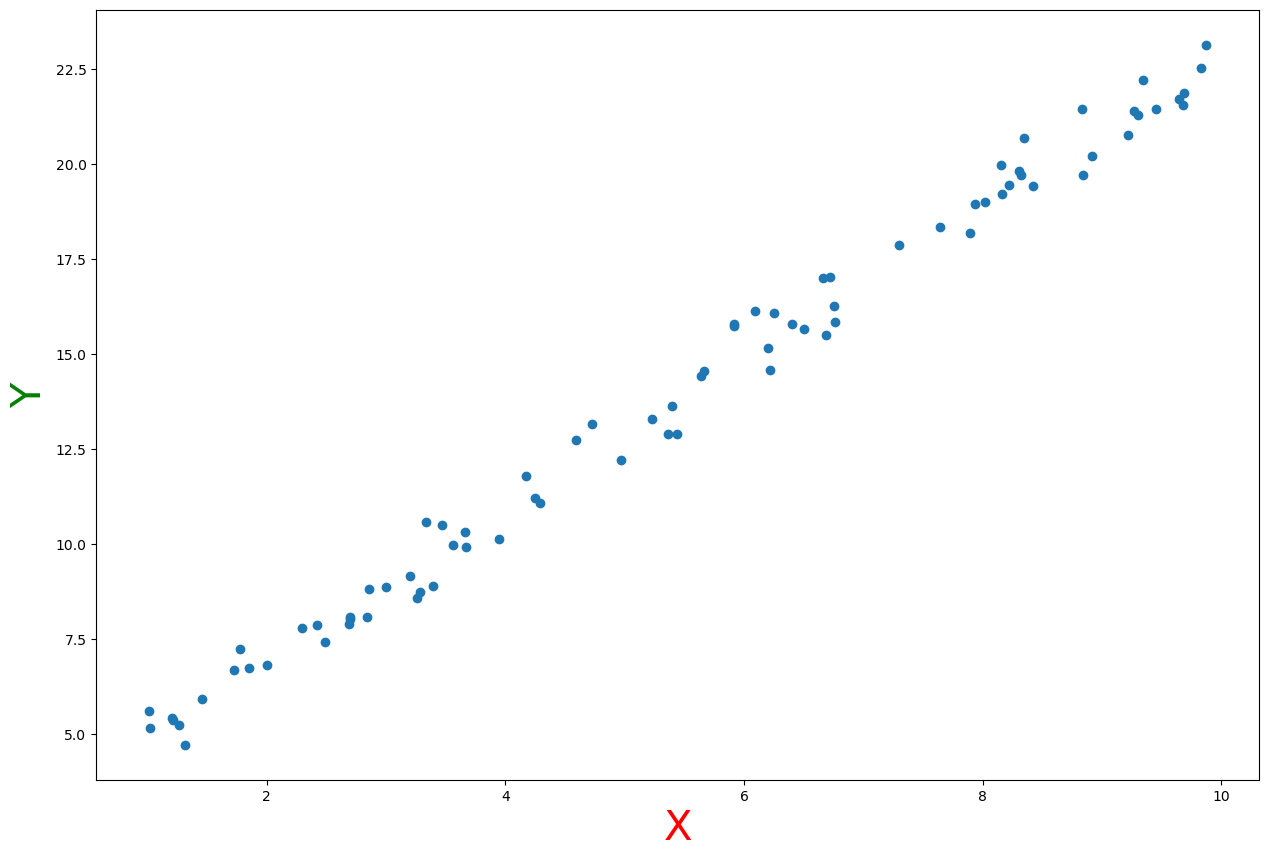

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x=np.random.RandomState(5).uniform(1,10,80)
b=(3 + np.random.RandomState(2).uniform(-1,1,80))
y=2*x + b
plt.figure(figsize=(15,10))
# print(b)
plt.xlabel("X",color='red',size=30)
plt.ylabel("Y",color='green',size=30)
plt.scatter(x,y)
plt.show()

## Loss function and cost function

In [9]:
def cost(y,yhat):
#     loss= abs(x-xhat)**3
    loss=np.abs(y-yhat)**3
    cost = np.mean(loss)
    return cost

## Hypothesis

In [10]:
def hypothesis(x,w,b):
    return w*x + b

# def hypothesis(y,w,b):
#     return (y-b)/w

## Gradient Descent

In [25]:
def gradient_descent(x,y,w,b,lrate,m):
    yhat=hypothesis(x,w,b)
    m=len(x)
    dw = (-3.0/m) * np.sum(np.multiply(x,((y-yhat)**2),np.sign(y-yhat)))
    db = (-3.0/m) * np.sum(np.multiply((y-yhat)**2 , np.sign(y-yhat)))
    w = w - (lrate * dw)
    b = b - (lrate * db)
    return w,b

# def gradient_descent(x, y, w, b, lrate, m):
#     m=len(x)
#     xhat=hypothesis(y,w,b)
#     dw= (3/m) * np.sum(np.multiply(np.abs(x - xhat)**2,(xhat/w),np.sign(x - xhat)))
#     db= (3/m) * np.sum(np.multiply(np.abs(x - xhat)**2, np.sign(x - xhat)))
#     w = w - (lrate*dw)
#     b = b - (lrate*db)
#     return w,b

## LINEAR REGRESSION

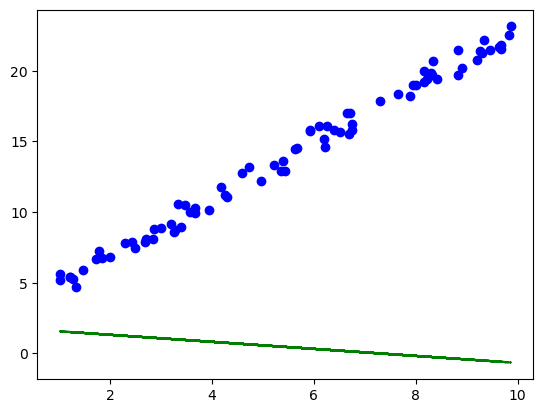

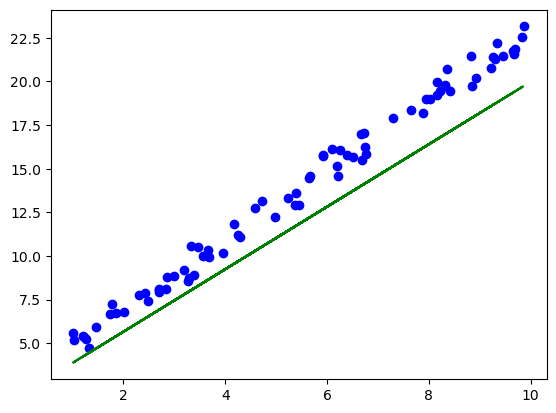

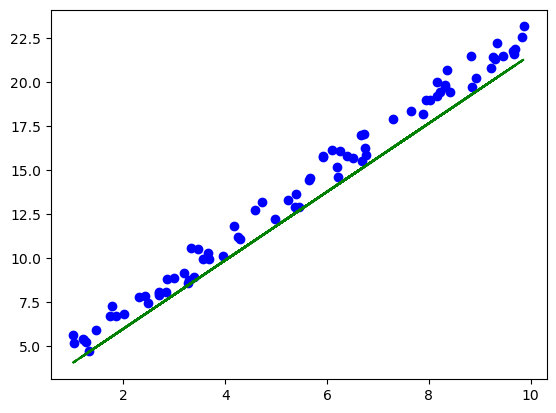

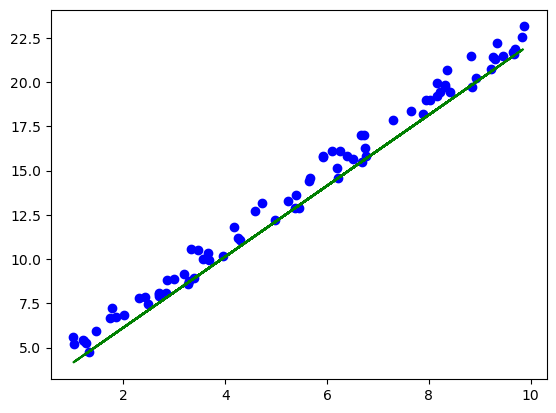

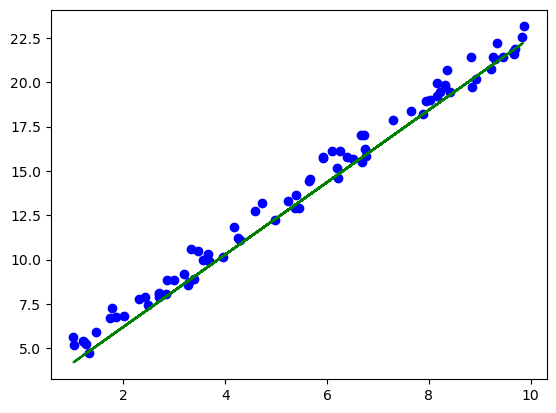

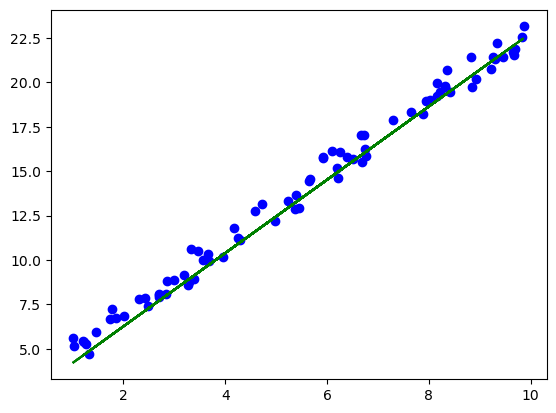

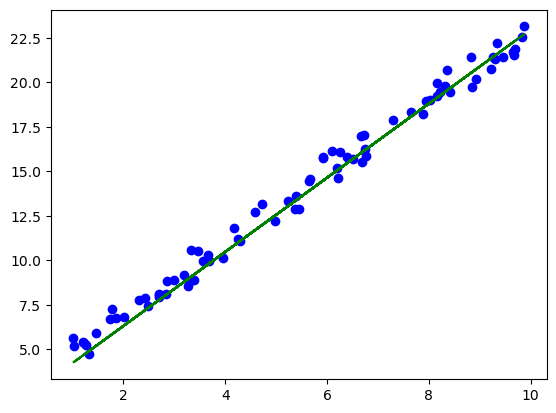

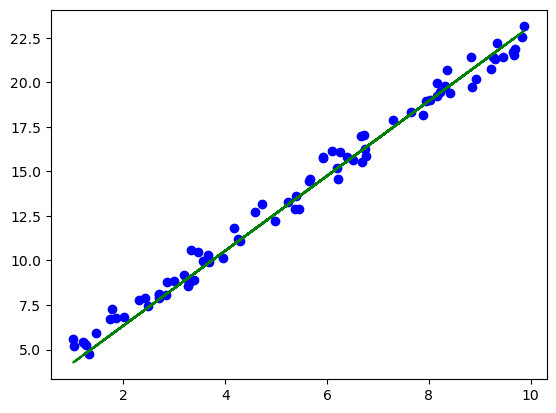

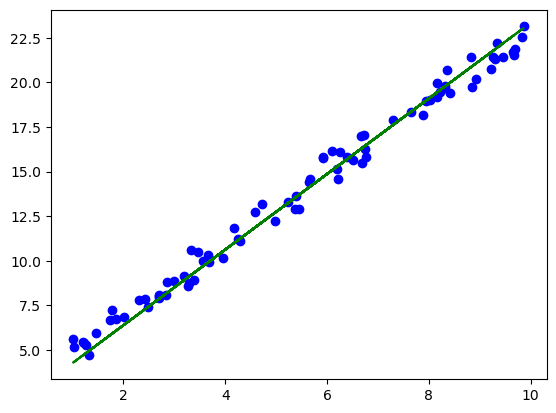

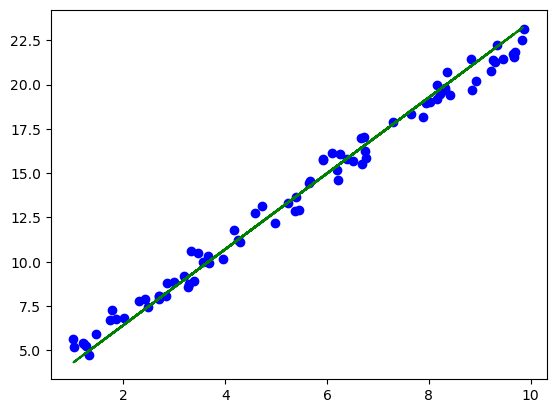

In [57]:
w = np.random.RandomState(2).randn(1)
b = np.random.RandomState(3).randn(1)

lrate = 0.00003
num_epochs = 1000
m=len(x)
        
L=[]
for i in range(num_epochs):
    w, b = gradient_descent(x,y,w,b,lrate, m)
    yhat = hypothesis(x,w,b)
    L.append(cost(y,yhat))
    if (i%(num_epochs/10))==0:
        plt.plot(x,y,'bo')
        plt.plot(x,yhat,'g--')
        plt.show()

In [13]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model = lr.fit(x.reshape(-1,1), y.reshape(-1,1))


model.coef_ , model.intercept_


(array([[1.99919247]]), array([2.92203997]))

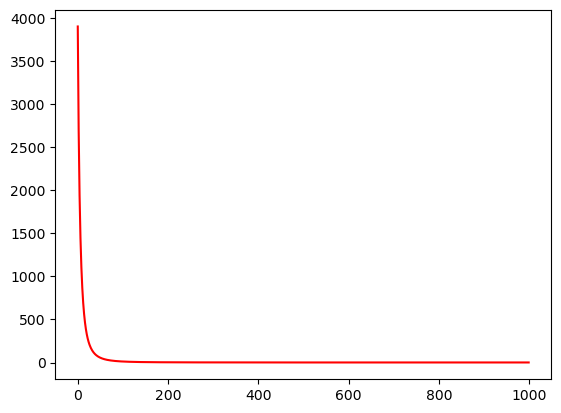

In [51]:
plt.plot(L,'r')
plt.show()



for loss of form (x-xhat)^7



## Generating dataset using numpy.random

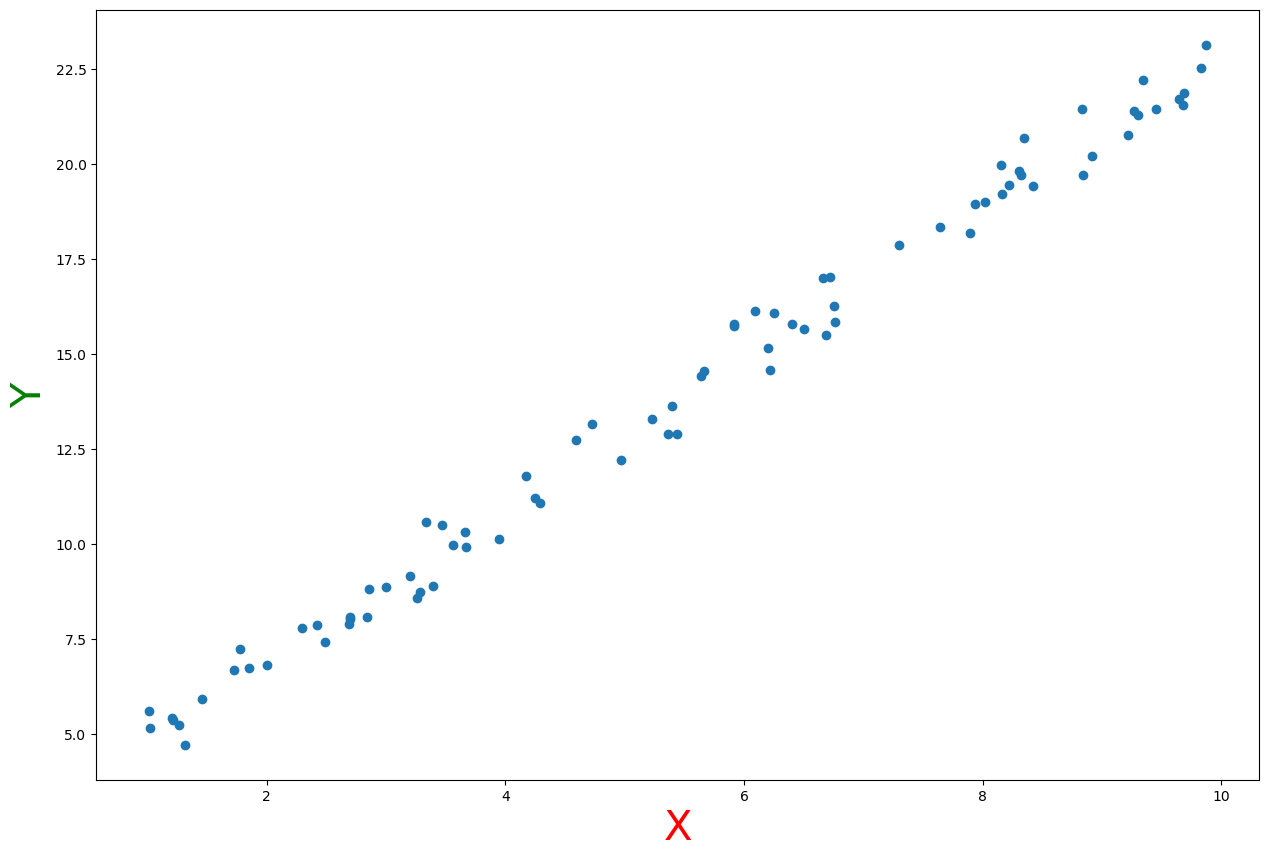

In [106]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x=np.random.RandomState(5).uniform(1,10,80)
b=(3 + np.random.RandomState(2).uniform(-1,1,80))
y=2*x + b
plt.figure(figsize=(15,10))
# print(b)
plt.xlabel("X",color='red',size=30)
plt.ylabel("Y",color='green',size=30)
plt.scatter(x,y)
plt.show()

## Defining cost function, loss function ,hypothesis and gradient descent and then implementing

In [105]:
split_ratio = 0.8
split_index = int(split_ratio * len(x))
x_train, y_train = x[:split_index], y[:split_index]
x_test, y_test = x[split_index:], y[split_index:]
# Normalize the data
x_mean, x_std = np.mean(x_train), np.std(x_train)
y_mean, y_std = np.mean(y_train), np.std(y_train)

x_train_normalized = (x_train - x_mean) / x_std
y_train_normalized = (y_train - y_mean) / y_std

x_test_normalized = (x_test - x_mean) / x_std
y_test_normalized = (y_test - y_mean) / y_std
def add_polynomial_features(X, degree):
    X_poly = np.c_[X]  # Start with the original features
    for d in range(2, degree + 1):
        X_poly = np.c_[X_poly, X**d]  # Add higher-degree features
    return X_poly

degree = 2
X_poly_train = add_polynomial_features(x_train_normalized, degree)
X_poly_test = add_polynomial_features(x_test_normalized, degree)

def custom_loss(X, X_pred):
    return np.mean(np.abs(X - X_pred)**7)

def custom_loss_gradient(X, X_pred):
    gradient = -7 * np.sign(X - X_pred) * np.abs(X - X_pred)**6
    return gradient
learning_rate = 0.001
num_epochs = 1000
m = len(y_train_normalized)
w = np.random.randn(X_poly_train.shape[1], 1)

for iteration in range(num_epochs):
    X_pred = X_poly_train.dot(w)
    gradients = X_poly_train.T.dot(custom_loss_gradient(y_train_normalized, X_pred))
    
    # Apply gradient clipping to prevent extremely large gradients
    gradients = np.clip(gradients, -1, 1)
    
    w = w - learning_rate * gradients.reshape(-1, 1)

X_pred_test = X_poly_test.dot(w)

# Denormalize the predictions
X_pred_test_denormalized = X_pred_test * y_std + y_mean

# Plot the results
plt.scatter(x_test, y_test, label='Actual data')
sorted_indices = np.argsort(x_test[:, 0])
plt.plot(x_test[sorted_indices], X_pred_test_denormalized[sorted_indices], color='r', label=f'Polynomial Regression (Degree {degree})')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

ValueError: operands could not be broadcast together with shapes (2,1) (128,1) 

In [53]:
def cost2(y, yhat):
    loss2 = (np.abs(y-yhat))**7
    cost2 = np.mean(loss2)
    return cost2

In [54]:
def hypothesis(x,w,b):
    return w*x + b

In [73]:
def gradient_descent2(x, y, w, b, lrate, m):
    yhat = hypothesis(x, w, b)
    m=len(x)
    dw = (-7.0/m) * np.sum(np.multiply(x,((y-yhat)**6),np.sign(y-yhat)))
    db = (-7.0/m) * np.sum(np.multiply((y-yhat)**6,np.sign(y-yhat)))
    w = w - (lrate * dw)
    b = b - (lrate * db)
    return w,b


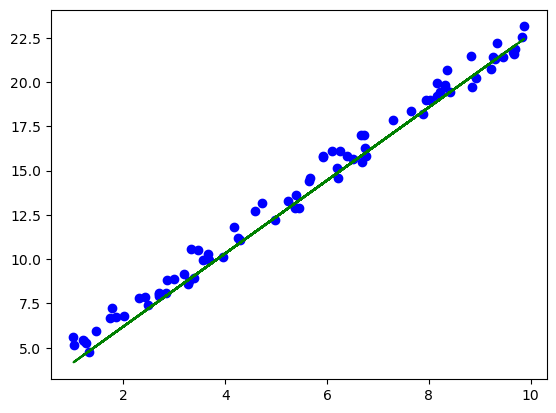

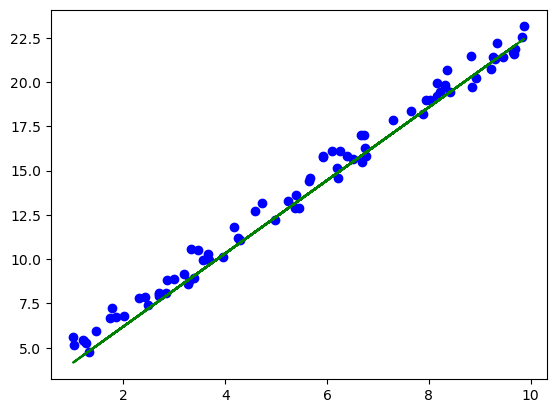

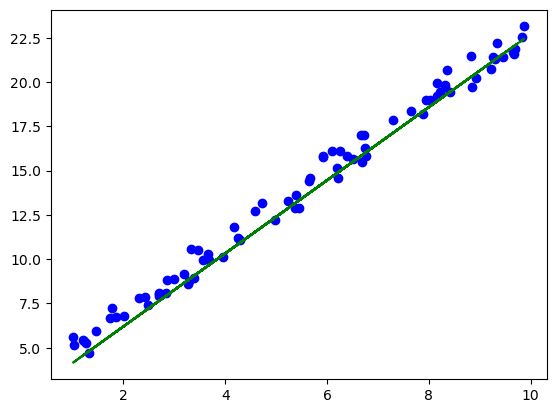

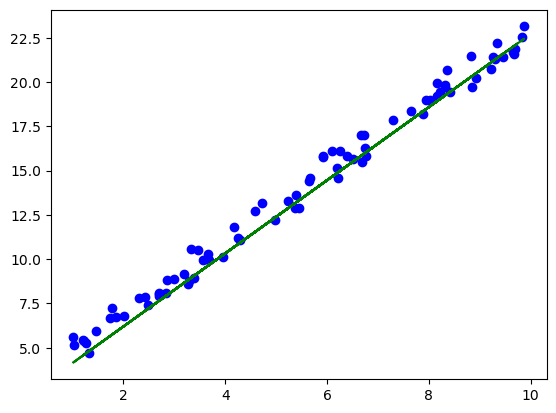

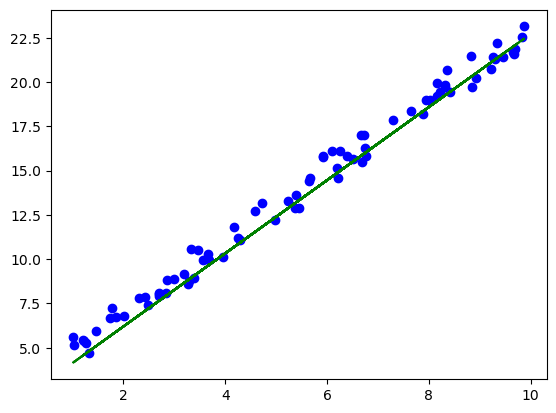

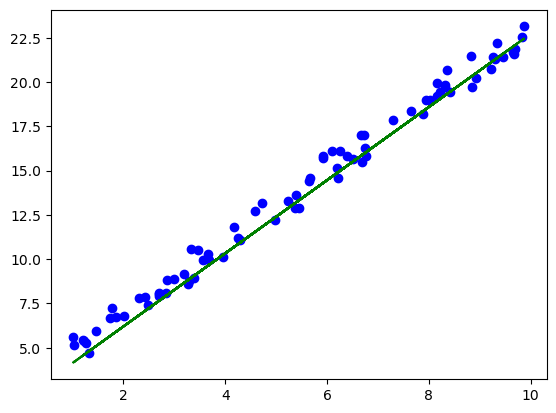

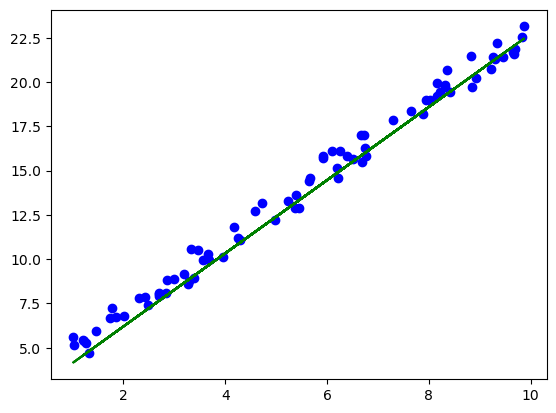

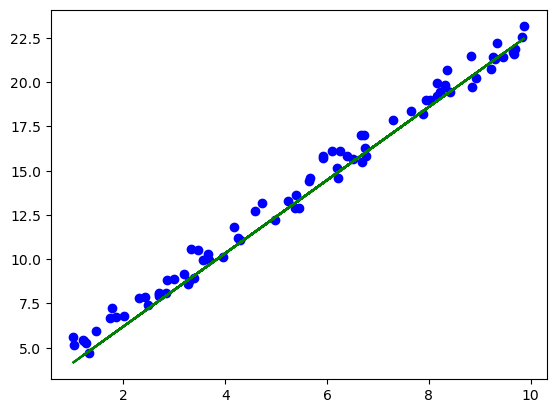

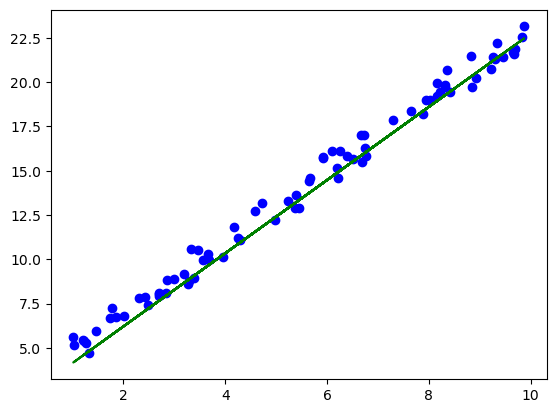

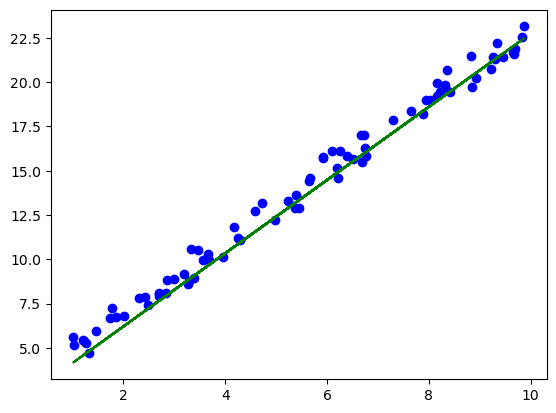

In [98]:
w = np.random.RandomState(2).randn(1)
b = np.random.RandomState(3).randn(1)

lrate = 0.00000000088
num_epochs = 100000
m=len(x)
        
L=[]
for i in range(num_epochs):
    w, b = gradient_descent2(x,y,w,b,lrate, m)
    yhat = hypothesis(x,w,b)
    L.append(cost(y,yhat))
    if (i%(num_epochs/10))==0:
        plt.plot(x,y,'bo')
        plt.plot(x,yhat,'g--')
        plt.show()

In [99]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model = lr.fit(x.reshape(-1,1), y.reshape(-1,1))


model.coef_ , model.intercept_


(array([[1.99919247]]), array([2.92203997]))

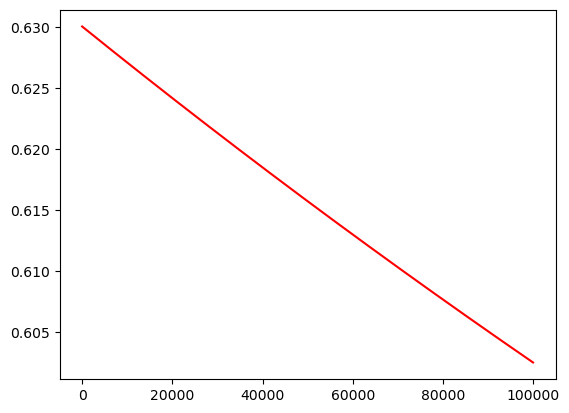

In [100]:
plt.plot(L,'r')
plt.show()